In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [21]:
import numpy as np
import pandas as pd 
import seaborn as sns
import os
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from xgboost import XGBClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU

import tensorflow_datasets as tfds
import PIL

In [4]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)
test = ImageDataGenerator(rescale = 1/255)

In [7]:
train_dataset = train.flow_from_directory('images/Chicken Rice/train/',
                                         target_size = (56,56))

val_dataset = validation.flow_from_directory('images/Chicken Rice/validation/',
                                         target_size = (56,56))

Found 476 images belonging to 2 classes.
Found 189 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'Roasted': 0, 'Steamed': 1}

In [9]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
train_dataset

In [84]:
model = Sequential()
# input: 28x28 images with 1 channels -> (28, 28, 1) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 3),padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, kernel_size=5, activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(128, kernel_size=5, activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(256, kernel_size=5, activation='relu',padding='same'))
model.add(BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())



#model = keras.applications.inception_v3.InceptionV3(weights= None, include_top=False, input_shape= (28,28,1))
model.add(Dense(256, activation='relu', name='my_dense'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 56, 56, 32)        896       
                                                                 
 batch_normalization_48 (Bat  (None, 56, 56, 32)       128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 56, 56, 32)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 56, 56, 32)        9248      
                                                                 
 batch_normalization_49 (Bat  (None, 56, 56, 32)       128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 56, 56, 32)       

In [85]:
from keras.models import Model
layer_name='my_dense'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)

intermediate_layer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48_input (InputLayer  [(None, 56, 56, 3)]      0         
 )                                                               
                                                                 
 conv2d_48 (Conv2D)          (None, 56, 56, 32)        896       
                                                                 
 batch_normalization_48 (Bat  (None, 56, 56, 32)       128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 56, 56, 32)        0         
                                                                 
 conv2d_49 (Conv2D)          (None, 56, 56, 32)        9248      
                                                                 
 batch_normalization_49 (Bat  (None, 56, 56, 32)       128 

In [86]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 15,
    horizontal_flip = False,
    zoom_range = 0.20)

In [87]:
from keras.optimizers import Adam, Adadelta, RMSprop

model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])


history = model.fit_generator(train_dataset,
                              epochs = 20,
                              shuffle=True,
                              validation_data = (val_dataset),
                              verbose = 1)

<ipython-input-87-9665d95c6f5d>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_dataset,


Epoch 1/20
15/15 [==============================] - 27s 2s/step - loss: 0.5789 - accuracy: 0.7143 - val_loss: 0.6874 - val_accuracy: 0.5556
Epoch 2/20
15/15 [==============================] - 28s 2s/step - loss: 0.2970 - accuracy: 0.8887 - val_loss: 0.7945 - val_accuracy: 0.5556
Epoch 3/20
15/15 [==============================] - 38s 3s/step - loss: 0.2782 - accuracy: 0.8971 - val_loss: 1.0553 - val_accuracy: 0.5556
Epoch 4/20
15/15 [==============================] - 48s 3s/step - loss: 0.2440 - accuracy: 0.9076 - val_loss: 1.5695 - val_accuracy: 0.5556
Epoch 5/20
15/15 [==============================] - 35s 2s/step - loss: 0.2065 - accuracy: 0.9223 - val_loss: 2.8546 - val_accuracy: 0.5556
Epoch 6/20
15/15 [==============================] - 39s 3s/step - loss: 0.1828 - accuracy: 0.9433 - val_loss: 1.4162 - val_accuracy: 0.5556
Epoch 7/20
15/15 [==============================] - 36s 2s/step - loss: 0.1709 - accuracy: 0.9454 - val_loss: 0.9309 - val_accuracy: 0.6190
Epoch 8/20
15/15 [==

Found 55 images belonging to 2 classes.
2/2 [==============================] - 1s 555ms/step


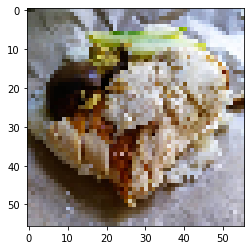

Steamed


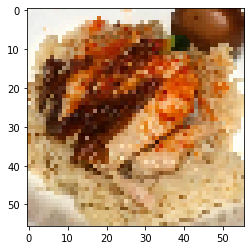

Steamed


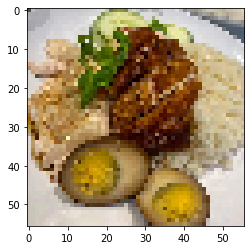

Steamed


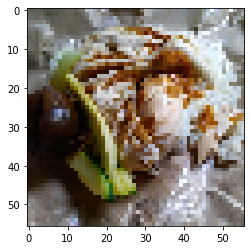

Steamed


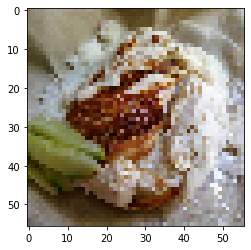

Steamed


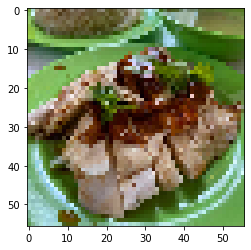

Steamed


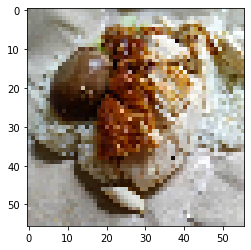

Steamed


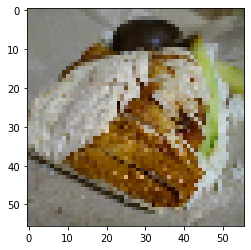

Steamed


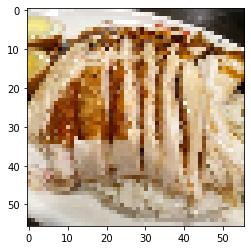

Steamed


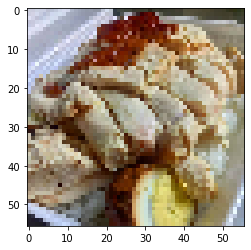

Steamed


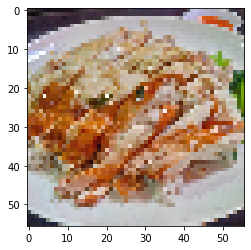

Steamed


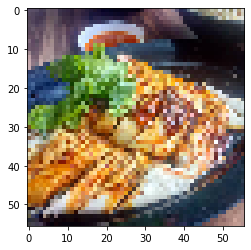

Steamed


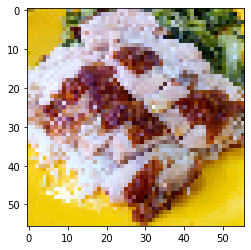

Steamed


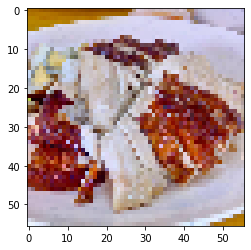

Steamed


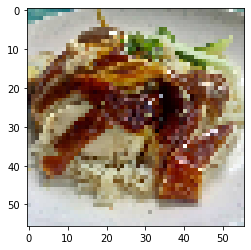

Steamed


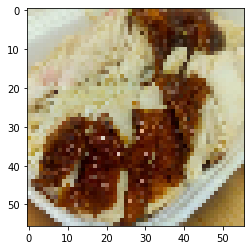

Steamed


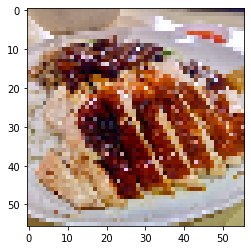

Steamed


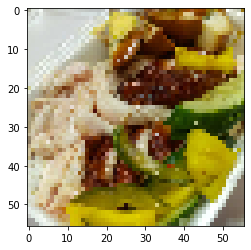

Steamed


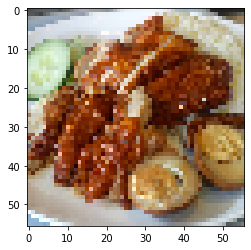

Steamed


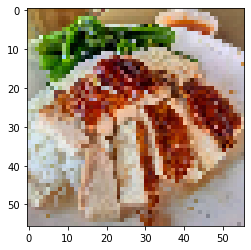

Steamed


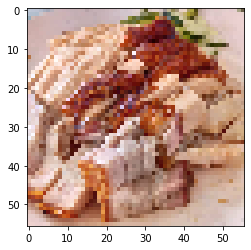

Steamed


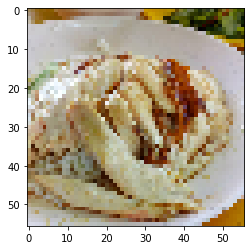

Steamed


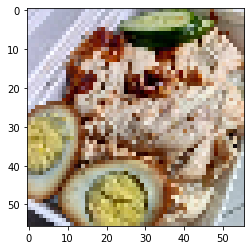

Steamed


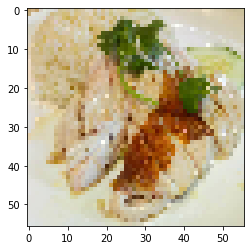

Steamed


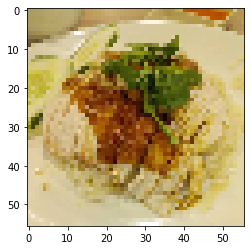

Steamed


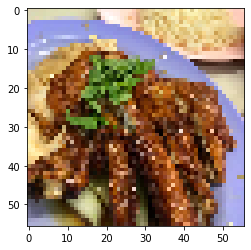

Steamed


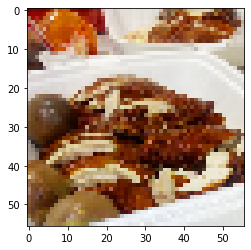

Steamed


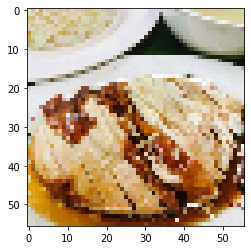

Steamed


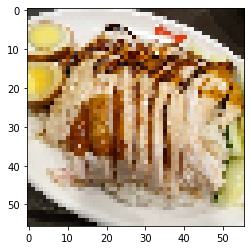

Steamed


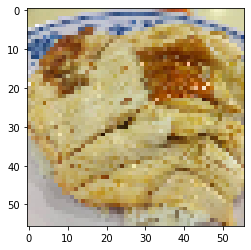

Steamed


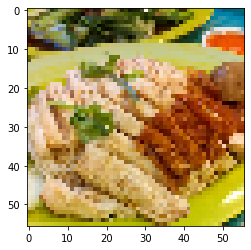

Steamed


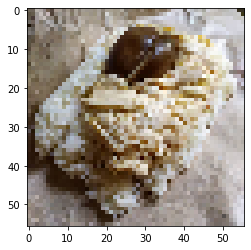

Steamed


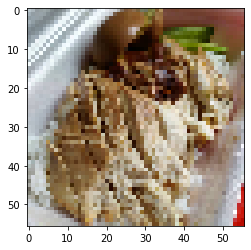

Steamed


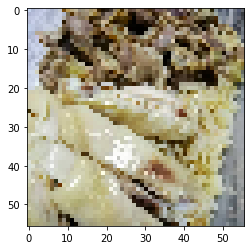

Steamed


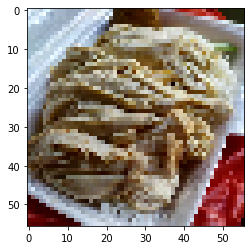

Steamed


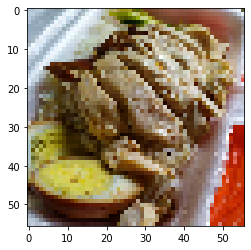

Steamed


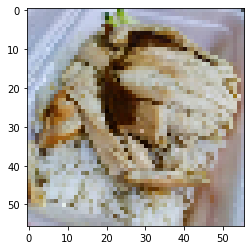

Steamed


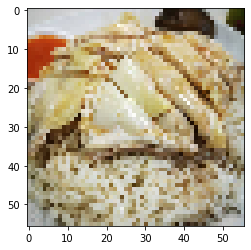

Steamed


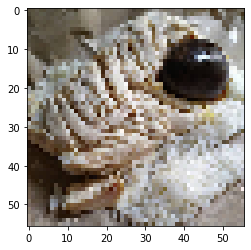

Steamed


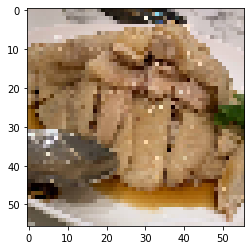

Steamed


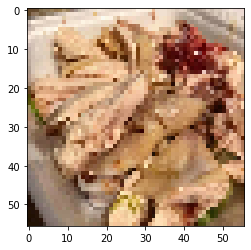

Steamed


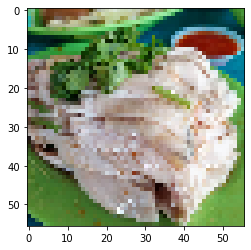

Steamed


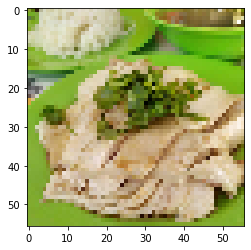

Steamed


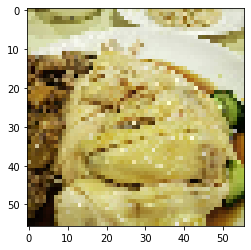

Steamed


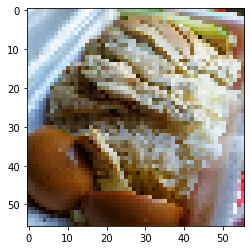

Steamed


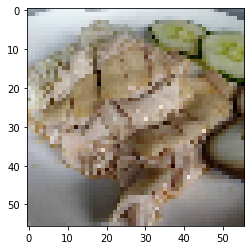

Steamed


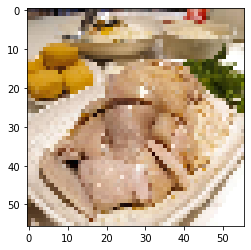

Steamed


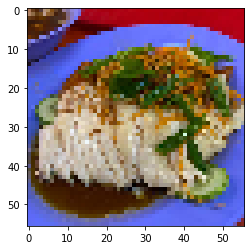

Steamed


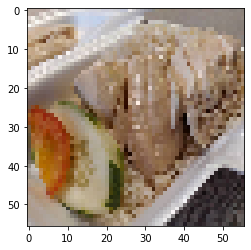

Steamed


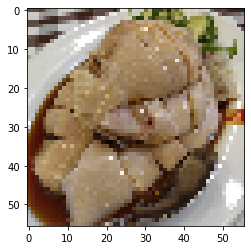

Steamed


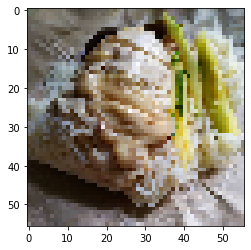

Steamed


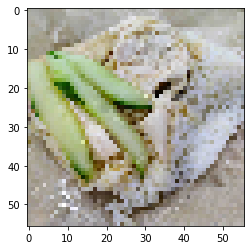

Steamed


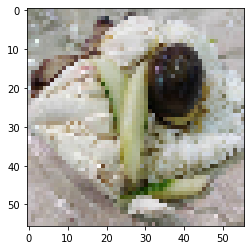

Steamed


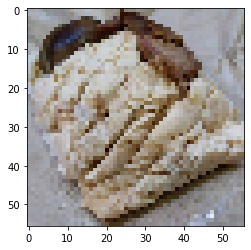

Steamed


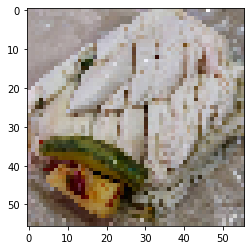

Steamed
Count = 0


In [134]:
dir_path = "chickenrice/Test/Roasted"
dir_path2 = "chickenrice/Test/Steamed"

count = 0

test_dataset = validation.flow_from_directory('chickenrice/test/',
                                         target_size = (56,56))

val = model.predict(test_dataset)

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+"/"+i, target_size = (56,56))
    plt.imshow(img)
    plt.show()
    
    if (val[count][0] > val[count][1]):
        print("Roasted")
    else:
        print("Steamed")

for i in os.listdir(dir_path2):
    img = image.load_img(dir_path2+"/"+i, target_size = (56,56))
    plt.imshow(img)
    plt.show()
    
    if (val[count][0] > val[count][1]):
        print("Roasted")
    else:
        print("Steamed")

print("Count = "+ str(count))
        
    

In [135]:
val

array([[1.10701146e-03, 9.98892963e-01],
       [8.98393395e-04, 9.99101639e-01],
       [9.29355979e-01, 7.06440136e-02],
       [6.42230064e-02, 9.35776949e-01],
       [2.48764612e-04, 9.99751270e-01],
       [1.74333185e-01, 8.25666785e-01],
       [1.84110656e-01, 8.15889359e-01],
       [3.21032130e-03, 9.96789634e-01],
       [1.40591073e-04, 9.99859333e-01],
       [8.17440748e-02, 9.18255985e-01],
       [1.49307922e-02, 9.85069215e-01],
       [2.68526538e-03, 9.97314751e-01],
       [9.39435777e-05, 9.99906063e-01],
       [3.10924603e-04, 9.99689102e-01],
       [9.10876691e-01, 8.91233161e-02],
       [1.49444299e-04, 9.99850512e-01],
       [8.71969581e-01, 1.28030449e-01],
       [1.41979789e-03, 9.98580217e-01],
       [2.47501972e-04, 9.99752462e-01],
       [1.19173795e-03, 9.98808265e-01],
       [7.13809719e-03, 9.92861927e-01],
       [8.52743745e-01, 1.47256270e-01],
       [4.84685268e-04, 9.99515295e-01],
       [3.89308226e-03, 9.96106923e-01],
       [4.349106